$\color{red}{EJERCICIO1}$

In [5]:
x =[68.78,74.11,71.73,69.88,67.25,68.78,68.34,67.01,63.45,71.19,67.19,65.80,64.30,67.97,72.18,65.27,66.09,67.51,70.1,68.25,67.89,68.14,69.08,72.80,67.42,68.49,68.61,74.03,71.52,68.18]
y=[162,212,220,206,152,183,167,175,156,186,183,163,163,172,194,168,161,164,188,187,162,192,184,206,175,154,187,212,195,205]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

$\color{blue}{NUMERO DE ITEMS}$

In [7]:
n = len(x)
n

30

$\color{blue}{VARIABLES -> VECTORES}$

In [8]:
x=np.array(x)
y=np.array(y)
x

array([68.78, 74.11, 71.73, 69.88, 67.25, 68.78, 68.34, 67.01, 63.45,
       71.19, 67.19, 65.8 , 64.3 , 67.97, 72.18, 65.27, 66.09, 67.51,
       70.1 , 68.25, 67.89, 68.14, 69.08, 72.8 , 67.42, 68.49, 68.61,
       74.03, 71.52, 68.18])

$\color{blue}{CALCULO DE DATOS}$

In [9]:
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x**2)
sumy2 = sum(y**2)
sumxy = sum(x*y)

promx = sumx/n
promy = sumy/n

sumy

5434

$\color{blue}{CALCULO ECUACION DEL MODELO LINEAL}$

In [10]:
m = (sumx*sumy-n*sumxy)/(sumx**2-n*sumx2)
b = promy-m*promx

m,b

(5.691413018082044, -209.9312436897747)

**y=-209.931x+5.6914**

$\color{blue}{CALCULO R2 AJD}$

In [11]:
sigmax = np.sqrt(sumx2/n-promx**2)
sigmay = np.sqrt(sumy2/n-promy**2)
sigmaxy = sumxy/n-promx*promy

R2=(sigmaxy/(sigmax/sigmay))**2
R2

76867.31498850457

$\color{blue}{GRAFICO}$

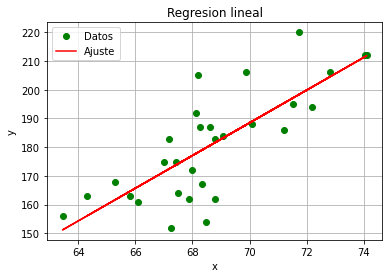

In [12]:
plt.plot(x,y,'o',label='Datos',color='green')
plt.plot(x,m*x+b,label='Ajuste',color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion lineal')
plt.grid()
plt.legend()
plt.show()

$\color{red}{EJERCICIO2}$

In [3]:
def Load_data():
    
    transacciones = (["A", "B", "C", "E"],["B", "E"],["C", "D", "E"],["A", "C", "D"],["A", "C", "E"],)

    return transacciones

In [5]:
def createC1 (data):
    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    
    return [ set (x) for x in C1]


In [6]:
def createCk(Lk, k):
    cand_list = []
    len_Lk = len(Lk)
    
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    return cand_list

In [7]:
def createCk(Lk, k):
    cand_list = []
    len_Lk = len(Lk)
    
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    return cand_list

In [8]:
min_support = 0.5

In [9]:
data = Load_data()
data

(['A', 'B', 'C', 'E'],
 ['B', 'E'],
 ['C', 'D', 'E'],
 ['A', 'C', 'D'],
 ['A', 'C', 'E'])

In [11]:
C1 = createC1(data)
C1


[{'A'}, {'B'}, {'C'}, {'D'}, {'E'}]

In [12]:
D = list(map(set, data))
D

[{'A', 'B', 'C', 'E'},
 {'B', 'E'},
 {'C', 'D', 'E'},
 {'A', 'C', 'D'},
 {'A', 'C', 'E'}]

In [13]:
L1, support_data1 = scanD(D, C1, min_support)

In [14]:
L1


[frozenset({'E'}), frozenset({'C'}), frozenset({'A'})]

In [15]:
support_data1

{frozenset({'A'}): 0.6,
 frozenset({'B'}): 0.4,
 frozenset({'C'}): 0.8,
 frozenset({'E'}): 0.8,
 frozenset({'D'}): 0.4}

k = 2

In [16]:
C2 = createCk(L1, k=2)
C2

[frozenset({'C', 'E'}), frozenset({'A', 'E'}), frozenset({'A', 'C'})]

In [17]:
L2, support_data2 = scanD(D, C2, min_support)

In [18]:
L2

[frozenset({'A', 'C'}), frozenset({'C', 'E'})]

In [19]:
support_data2


{frozenset({'C', 'E'}): 0.6,
 frozenset({'A', 'E'}): 0.4,
 frozenset({'A', 'C'}): 0.6}

k = 3

In [20]:
C3 = createCk(L2, k=3)
C3

[]

In [21]:
L3, support_data3 = scanD(D, C3, min_support)


In [22]:
L3

[]

In [23]:
support_data3


{}